This notebook can be used if there are too many files to load in memory at once. You can specify a batch size in config.py: make sure that all files in one batch fit into memory.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

from UKMovementSensing import hsmm

import pandas as pd
import numpy as np

In [3]:
execfile('config.py')

## Define the files to use

In [4]:
filenames = os.listdir(subset_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(subset_path,fn))]
filenames = [os.path.join(subset_path,filename) for filename in filenames]

## Train HSMM

Nr of batches: 2
0
Resampled all sequences in 29.0 seconds
Convergence: average Hamming distance is 0.590891203704
1
Resampled all sequences in 25.7 seconds
Convergence: average Hamming distance is 0.337470538721
2
Resampled all sequences in 24.9 seconds
Convergence: average Hamming distance is 0.178922558923
3
Resampled all sequences in 24.3 seconds
Convergence: average Hamming distance is 0.118331228956
4
Resampled all sequences in 24.3 seconds
Convergence: average Hamming distance is 0.0842055976431
5
Resampled all sequences in 24.4 seconds
Convergence: average Hamming distance is 0.0738562710438
6
Resampled all sequences in 25.7 seconds
Convergence: average Hamming distance is 0.0597474747475
7
Resampled all sequences in 24.6 seconds
Convergence: average Hamming distance is 0.0583249158249
8
Resampled all sequences in 25.2 seconds
Convergence: average Hamming distance is 0.0565772306397
9
Resampled all sequences in 24.4 seconds
Convergence: average Hamming distance is 0.05672558922

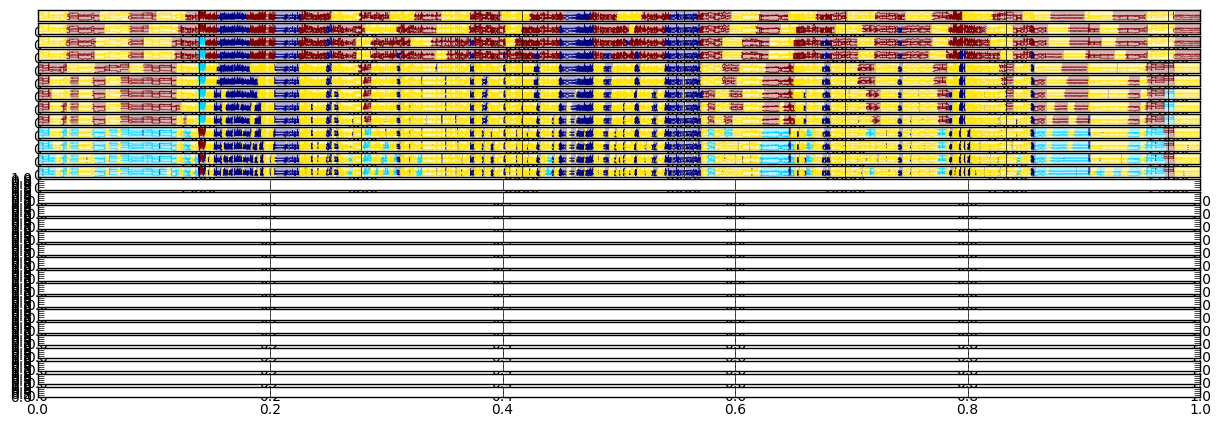

In [5]:
#Note that with many iterations, the visualization becomes badly visible
model = hsmm.train_hsmm_all(filenames, column_names, batchsize=batch_size, Nmax=Nmax, nr_resamples=nr_resamples, 
                            trunc=truncate, visualize=True)

## Save the data with the states

Get the state sequence for each datafile, and save the data including the states found. This labeled data serves as an input to the analyses.

In [ ]:
for filename in filenames:
    dat = pd.read_csv(filename)
    X = dat[column_names].as_matrix()
    prediction = model.predict(X, 0)
    dat['state'] = prediction[1]
    fn_out = str(str(dat['subset'][0]) + dat['filename'][0])+'.csv'
    print("saving "+fn_out)
    dat.to_csv(os.path.join(states_path_model, fn))

## Save the model

In [14]:
import pickle
#Remove the data from the model
model.states_list = []

if not os.path.exists(model_path):
        os.makedirs(model_path)
with open(os.path.join(model_path, model_name), 'wb') as f:
    pickle.dump(model, file=f)